# Total GPUs sold

In [8]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [9]:
gpu_volumes = pd.read_csv('../data/gpu_volume.csv')
gpu_volumes.dropna(axis=1, inplace=True)
gpu_volumes = gpu_volumes[['model', 'timestamp', 'volume']]
gpu_volumes['date'] = gpu_volumes['timestamp'].apply(lambda x: datetime.fromtimestamp(x/1000))
gpu_volumes.drop(['timestamp'], axis=1, inplace=True)
gpu_volumes = gpu_volumes[gpu_volumes['volume'] != 0]

In [10]:
# see how much sold for each gpu
gpus_sold_by_model = gpu_volumes.drop(columns='date').groupby('model').sum().reset_index().sort_values(by='volume', ascending=False)
gpus_sold_by_model
# don't need date, just looking at sum total

,model,volume
10,Geforce RTX 3060,52450
11,Geforce RTX 3070,50401
12,Geforce RTX 3080,41333
13,Geforce RTX 3090,20721
32,Radeon RX 6700,7711
33,Radeon RX 6700 XT,7656
29,Radeon RX 6600,6490
7,Geforce RTX 2060,6324
17,Geforce RTX 4090,5910
26,Radeon RX 5700 XT,5499


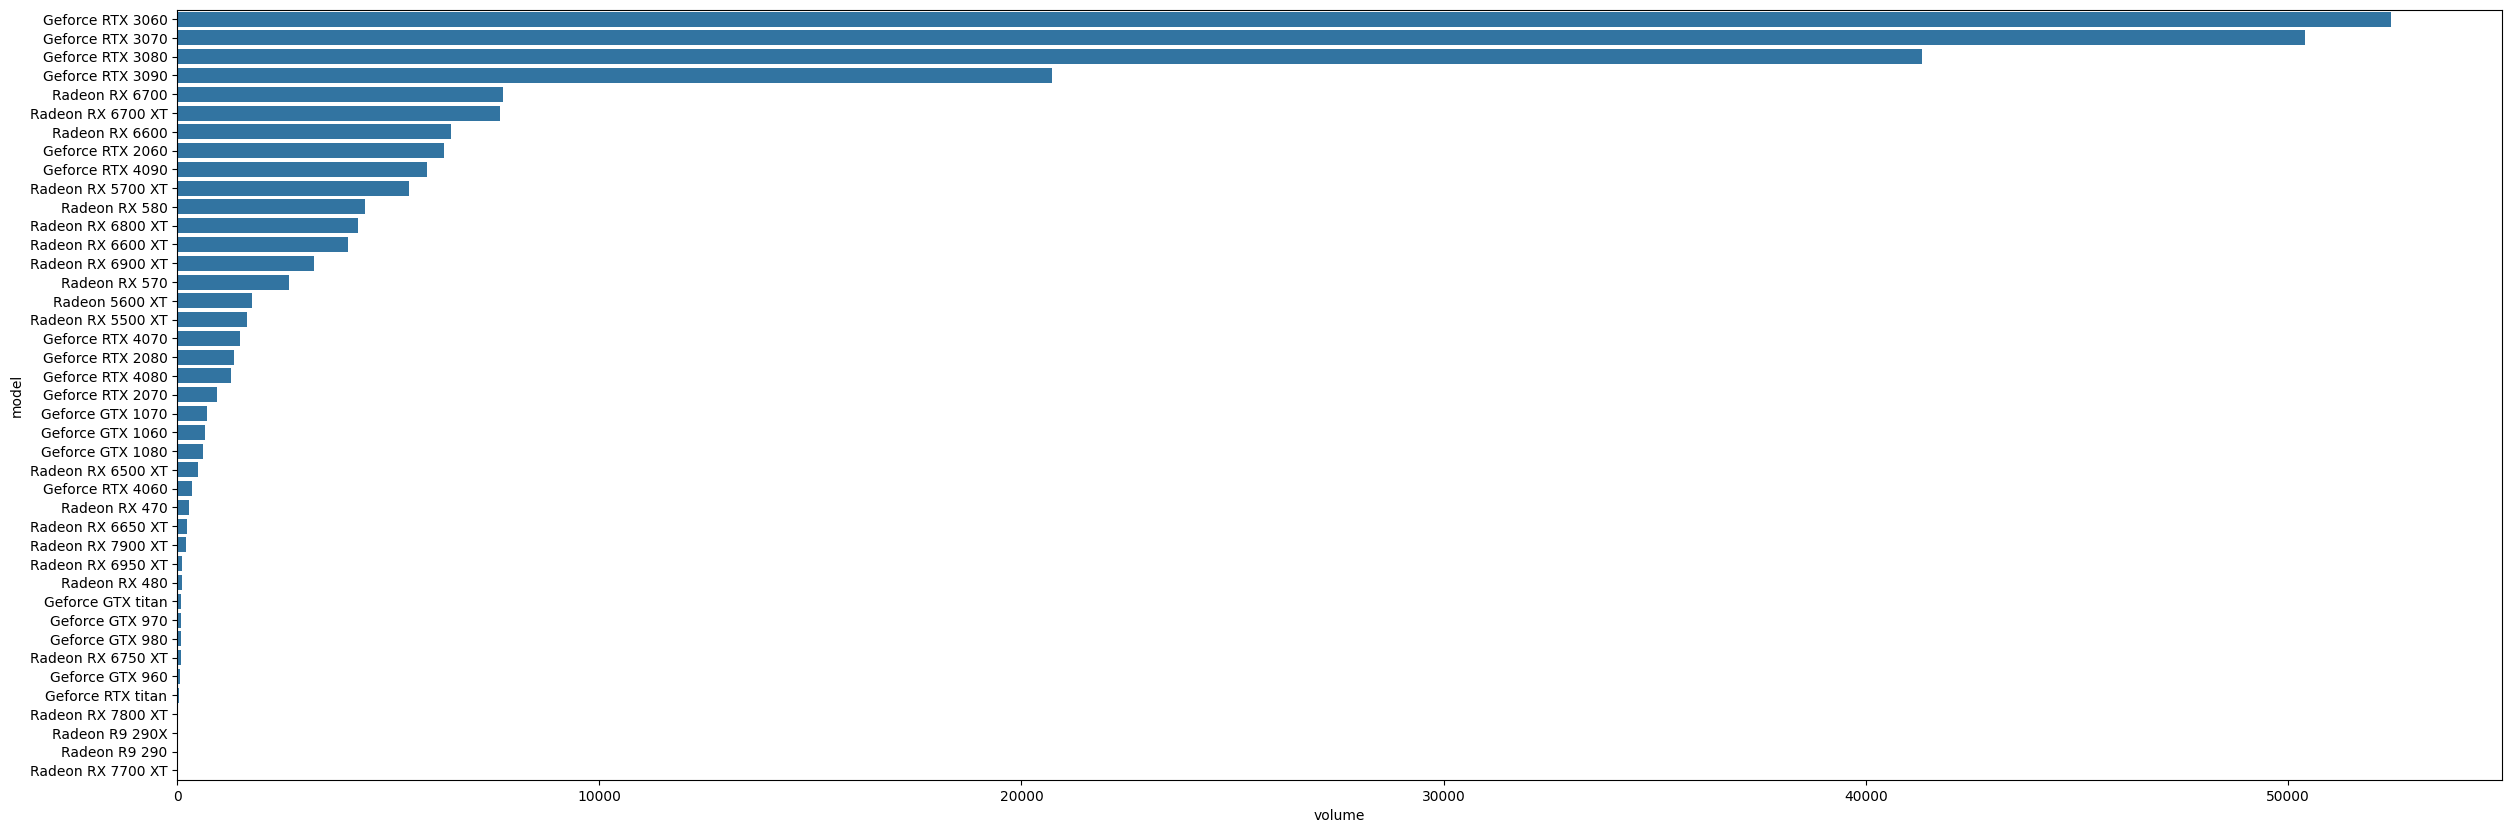

In [20]:
# on ebay, mostly sold gpus are from the 3000 series, perhaps were the most scalped on ebay compared to gpus from other generations
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(data=gpus_sold_by_model, x='volume', y='model', orient = 'y')
f2 = plt.gcf()